# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Write your code here to read the data
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/foodhub_order.csv')

In [4]:
# Write your code here to view the first 5 rows
data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [5]:
print("The dataset contains {:d} rows and {:d} columns".format(data.shape[0],data.shape[1]))

The dataset contains 1898 rows and 9 columns


* The dataset contains 1898 rows and 9 columns







### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


*   There are 5 numeric columns and 4 categorical columns:
    "order_id", "customer_id", "cost_of_the_order", "food_preparation_time", "delivery_time" are numeric, "restaurant_name", "cuisine_type", "day_of_the_week", "rating" are strings
*   There doesn't appear to be any missing values.


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [7]:
data.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

* there are no missing values in the dataset


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [8]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


* It takes minimum 20 minutes to prepare an order once it is placed
* On average it takes 27 minutes to prepare an order
* The longest order took 35 minutes to be prepared
* The food delivery time ranges from 15 to 33 minutes and takes on average 24 minutes



### **Question 5:** How many orders are not rated? [1 mark]

In [9]:
data['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

In [10]:
data[data['rating']=='Not given'].rating.count()

736

In [11]:
data['rating'].value_counts(normalize=True)

rating
Not given    0.387777
5            0.309800
4            0.203372
3            0.099052
Name: proportion, dtype: float64

* 736 out of 1898 orders (or almost 39%) are not rated.
* The orders that are rated have the rating of 3 (10%), 4 (20%) or 5 (31%).


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

####Checking the 'order_id' column

In [12]:
data.order_id.nunique()

1898

* There are no duplicate orders in the dataset

####Checking the 'customer_id' column

In [13]:
cust=data.customer_id.value_counts()
print("The dataset contains information about orders from {:d} different customers."
      "\nNumber of customers who placed more than 1 order is {:d}"
      "\nNumber of customers who placed only a single order is {:d}"
      "\nThe maximum number of orders placed by a single customer is {:d}".format(data.customer_id.nunique(),(cust>1).sum(),(cust==1).sum(),cust.max()))


The dataset contains information about orders from 1200 different customers.
Number of customers who placed more than 1 order is 416
Number of customers who placed only a single order is 784
The maximum number of orders placed by a single customer is 13


####Checking the 'restaurant_name' column

In [14]:
rest=data.restaurant_name.value_counts()
print("The dataset contains information about orders from {:d}"
      " different restaurants.\nNumber of restaurants which completed more than 1 order is {:d}"
      "\nNumber of restaurants which completed only a single order is {:d}"
      "\nThe restaurant with maximum number of orders is {} ({:d} orders)".format(data.restaurant_name.nunique(),(rest>1).sum(),(rest==1).sum(),rest.idxmax(),rest.max()))


The dataset contains information about orders from 178 different restaurants.
Number of restaurants which completed more than 1 order is 128
Number of restaurants which completed only a single order is 50
The restaurant with maximum number of orders is Shake Shack (219 orders)


####Checking 'cuisine_type' column

In [15]:
print ("The dataset contains orders for", data.cuisine_type.nunique(),"different cuisines:\n","\n ".join(data.cuisine_type.unique()))

The dataset contains orders for 14 different cuisines:
 Korean
 Japanese
 Mexican
 American
 Indian
 Italian
 Mediterranean
 Chinese
 Middle Eastern
 Thai
 Southern
 French
 Spanish
 Vietnamese


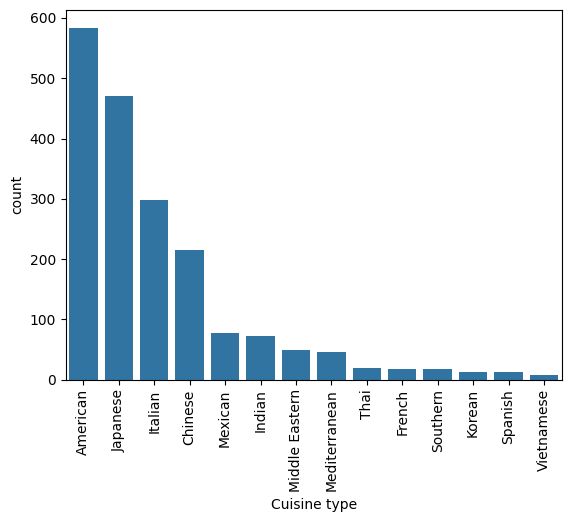

In [16]:
#Visualizing the number of orders for each cuisine type
sns.countplot(data=data, x='cuisine_type', order=data['cuisine_type'].value_counts().index);
plt.xticks(rotation = 90);
plt.xlabel('Cuisine type')
plt.show()

* Most popular cuisine types are American, Japanese, Italian and Chinese

####Checking the 'cost_of_the_order' column

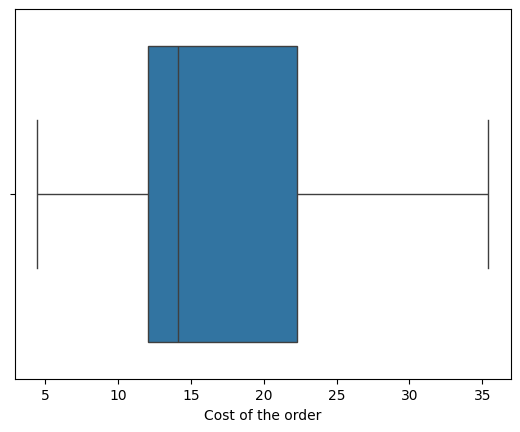

In [17]:
plt.xlabel('Cost of the order')
sns.boxplot(data=data,x='cost_of_the_order');
plt.show()

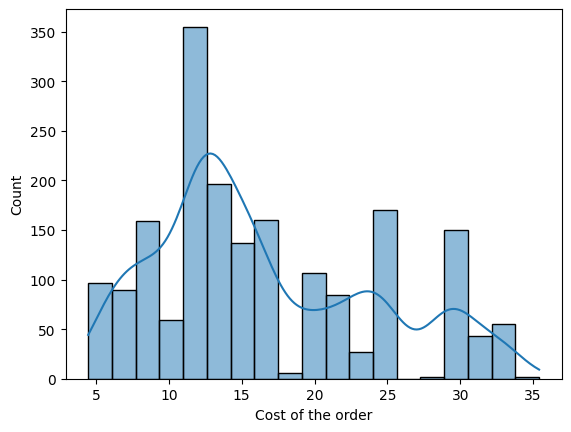

In [18]:
plt.xlabel('Cost of the order')
sns.histplot(data=data,x='cost_of_the_order', kde=True);
plt.show()

* There are no outliers in order costs
* The distribution is very slightly right-skewed

####Checking the 'day_of_the_week' column

In [19]:
data.day_of_the_week.value_counts()

day_of_the_week
Weekend    1351
Weekday     547
Name: count, dtype: int64

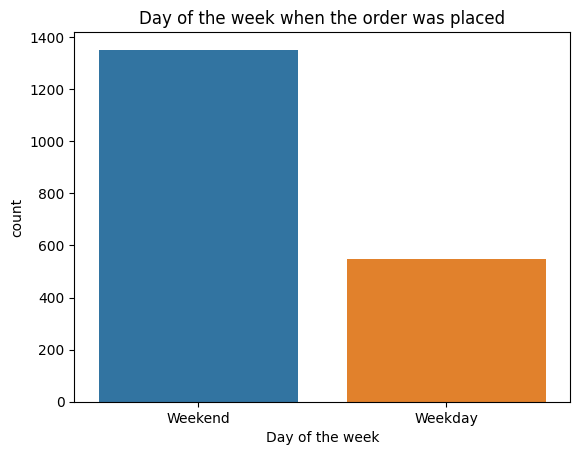

In [20]:
plt.title("Day of the week when the order was placed")
plt.xlabel("Day of the week")
sns.countplot(data=data, x='day_of_the_week', hue='day_of_the_week');
#plt.xticks(rotation = 90);
plt.show()

* Majority of the orders were placed on Saturdays and Sundays

####Checking the 'rating' column

In [21]:
data.rating.value_counts()

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

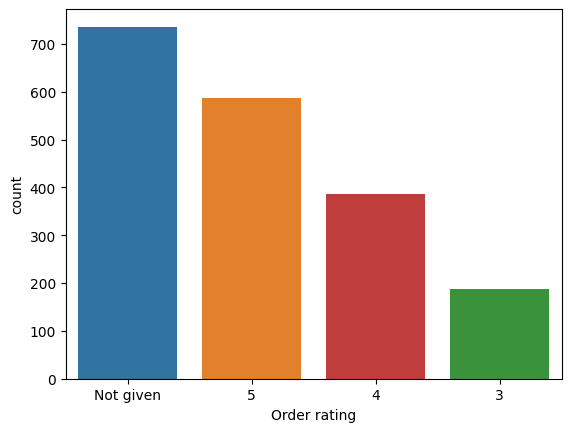

In [22]:
plt.xlabel('Order rating');
sns.countplot(data=data,x='rating', order=data['rating'].value_counts().index, hue='rating')
plt.show()

* Most people do not rate their orders.
* From the orders that were rated the majority got the highest rating

####Checking the 'food_preparation_time' column

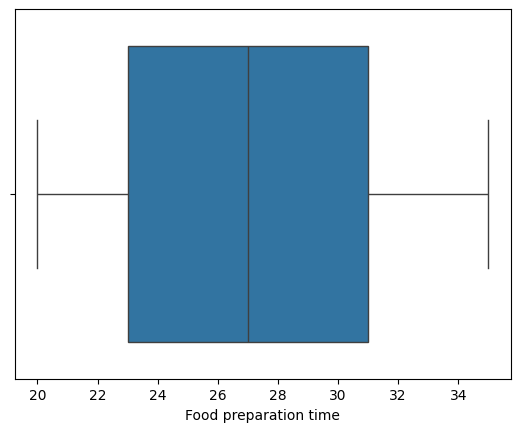

In [23]:
plt.xlabel('Food preparation time');
sns.boxplot(data=data,x='food_preparation_time');
plt.show();

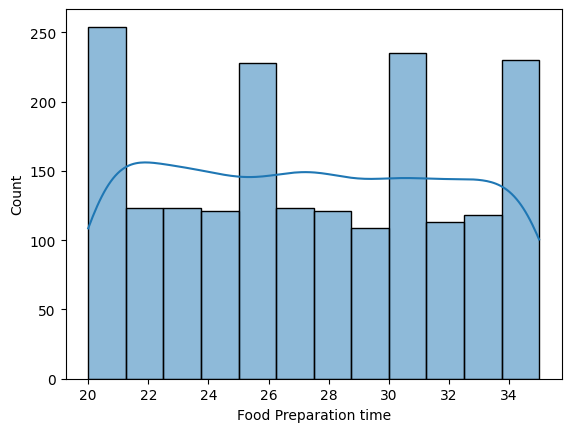

In [24]:
plt.xlabel('Food Preparation time');
sns.histplot(data=data,x='food_preparation_time', kde=True);
plt.show();

* There are no outliers in the Food preparation time
* The Food preparation time is normally distributed

####Checking the 'delivery_time' column

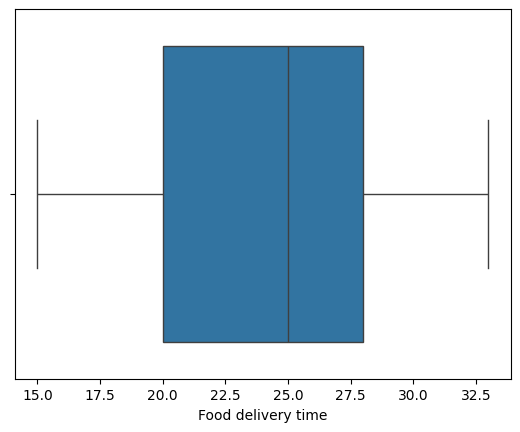

In [25]:
plt.xlabel('Food delivery time');
sns.boxplot(data=data,x='delivery_time');
plt.show()

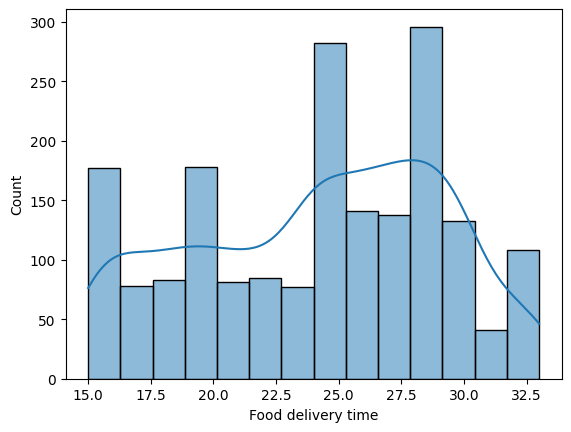

In [26]:
plt.xlabel('Food delivery time');
sns.histplot(data=data,x='delivery_time', kde=True);
plt.show()

* There are no outliers in Food delivery time
* It is very-very slightly left-skewed

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [27]:
top_rest=data.restaurant_name.value_counts().head()
print("The top 5 restaurants in terms of the number of orders received are:\n")
for i in range(5):
  print("{} with {} orders".format(top_rest.index[i],top_rest[top_rest.index[i]]))

The top 5 restaurants in terms of the number of orders received are:

Shake Shack with 219 orders
The Meatball Shop with 132 orders
Blue Ribbon Sushi with 119 orders
Blue Ribbon Fried Chicken with 96 orders
Parm with 68 orders


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [28]:
data.loc[data['day_of_the_week']=='Weekend'].cuisine_type.value_counts()


cuisine_type
American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: count, dtype: int64

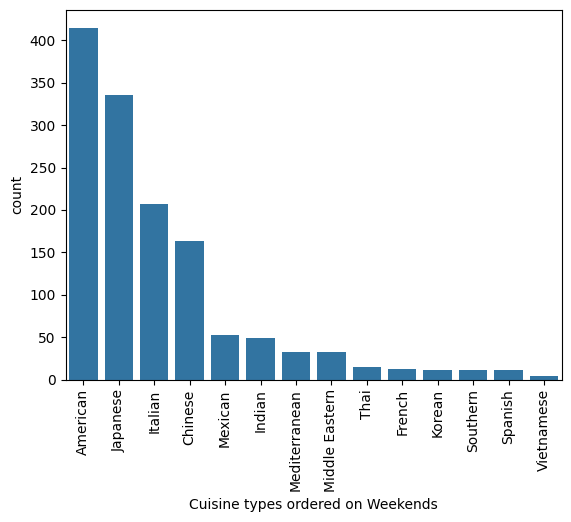

In [29]:
weekend_cuisine=data.loc[data['day_of_the_week']=='Weekend']
plt.xlabel('Cuisine types ordered on Weekends')
sns.countplot(data=weekend_cuisine, x='cuisine_type', order=weekend_cuisine['cuisine_type'].value_counts().index);
plt.xticks(rotation=90);
plt.show()


* The most popular type of cuisine on Weekends in American




### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [30]:
cost_20_perc=data.loc[data['cost_of_the_order']>20,'cost_of_the_order'].count()/data['cost_of_the_order'].count()*100
print("{:.2f}% of all orders cost more than 20 Dollars".format(cost_20_perc))

29.24% of all orders cost more than 20 Dollars


### **Question 10**: What is the mean order delivery time? [1 mark]

In [31]:
print("On average the orders are delivered in {:.1f} minutes".format(data.delivery_time.mean()))

On average the orders are delivered in 24.2 minutes


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [32]:
top_cust=data.customer_id.value_counts()
print("Top 3 most frequent customers are:")
for i in range(3):
  print("Customer with id {:d} who placed {:d} orders".format(top_cust.index[i],top_cust[top_cust.index[i]]))

Top 3 most frequent customers are:
Customer with id 52832 who placed 13 orders
Customer with id 47440 who placed 10 orders
Customer with id 83287 who placed 9 orders


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


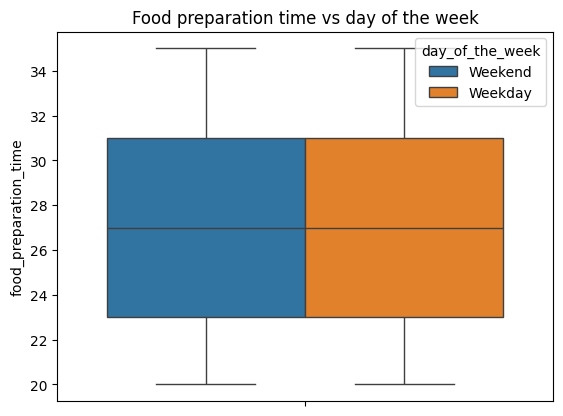

In [33]:
plt.title("Food preparation time vs day of the week");
sns.boxplot(data=data,y="food_preparation_time", hue="day_of_the_week");
plt.show();


* food preparation time is the same during all week

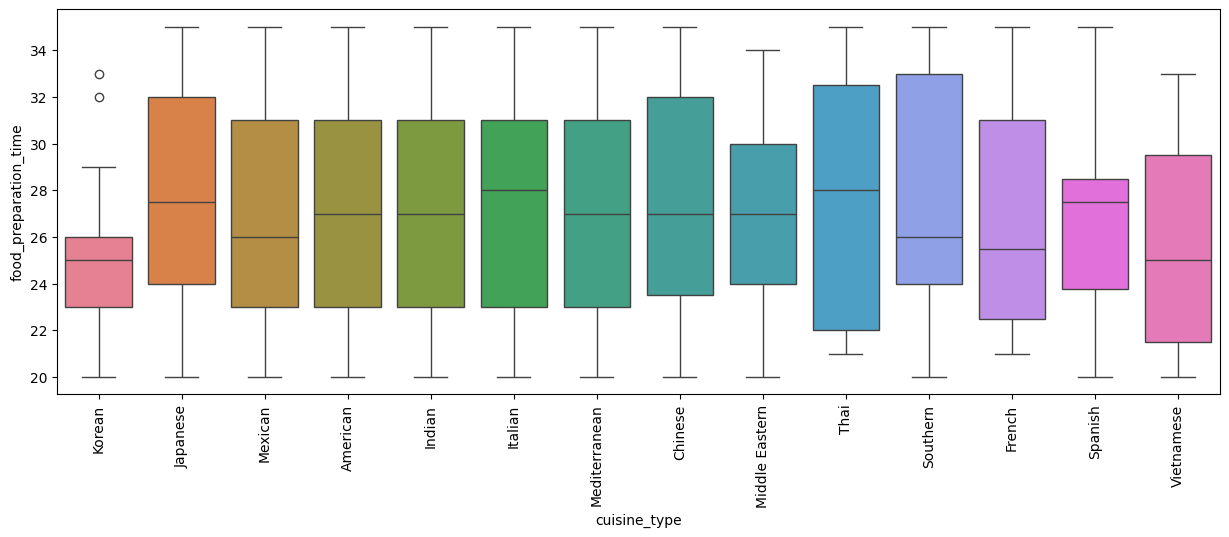

In [34]:
plt.figure(figsize=(15,5))
sns.boxplot(data=data, x='cuisine_type',y='food_preparation_time', hue='cuisine_type');
plt.xticks(rotation=90)
plt.show()


In [35]:
data.groupby('cuisine_type')['food_preparation_time'].describe()

,count,mean,std,min,25%,50%,75%,max
cuisine_type,,,,,,,,
American,584.0,27.440068,4.658474,20.0,23.00,27.0,31.0,35.0
Chinese,215.0,27.511628,4.758525,20.0,23.50,27.0,32.0,35.0
French,18.0,26.888889,5.039712,21.0,22.50,25.5,31.0,35.0
Indian,73.0,27.109589,4.620491,20.0,23.00,27.0,31.0,35.0
Italian,298.0,27.483221,4.519474,20.0,23.00,28.0,31.0,35.0
Japanese,470.0,27.510638,4.604496,20.0,24.00,27.5,32.0,35.0
Korean,13.0,25.461538,3.971049,20.0,23.00,25.0,26.0,33.0
Mediterranean,46.0,27.000000,4.908043,20.0,23.00,27.0,31.0,35.0
Mexican,77.0,26.727273,4.604450,20.0,23.00,26.0,31.0,35.0


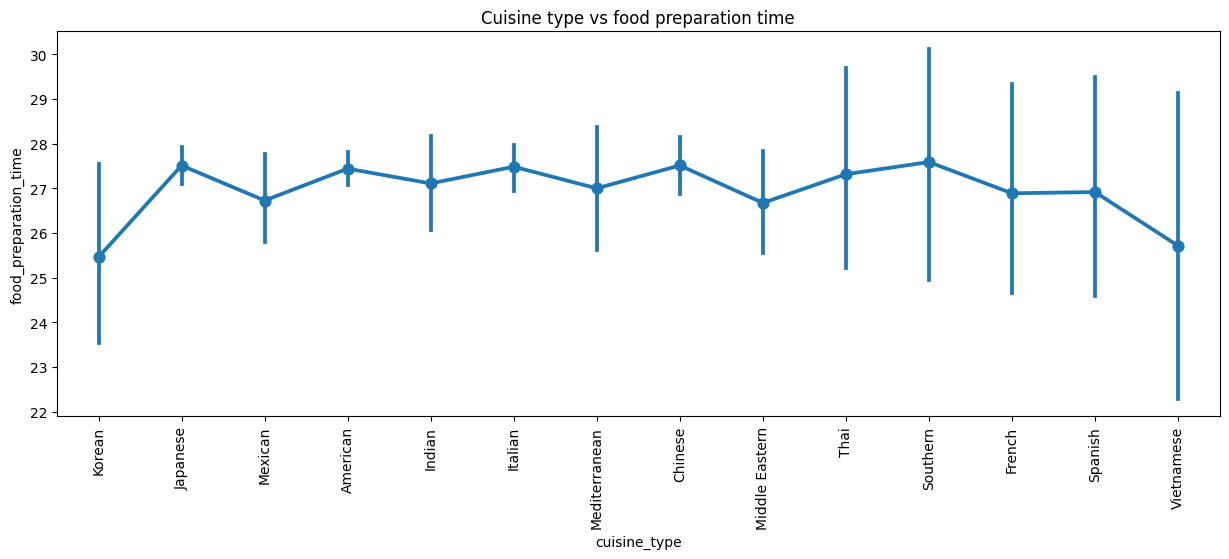

In [36]:
plt.figure(figsize=(15,5))
plt.title("Cuisine type vs food preparation time");
plt.xticks(rotation=90)
sns.pointplot(x = 'cuisine_type', y = 'food_preparation_time', data = data);
plt.show();

* Korean and Vietnamese food is prepared faster on average
* Italian and Thai take longer than the rest if we check the median time


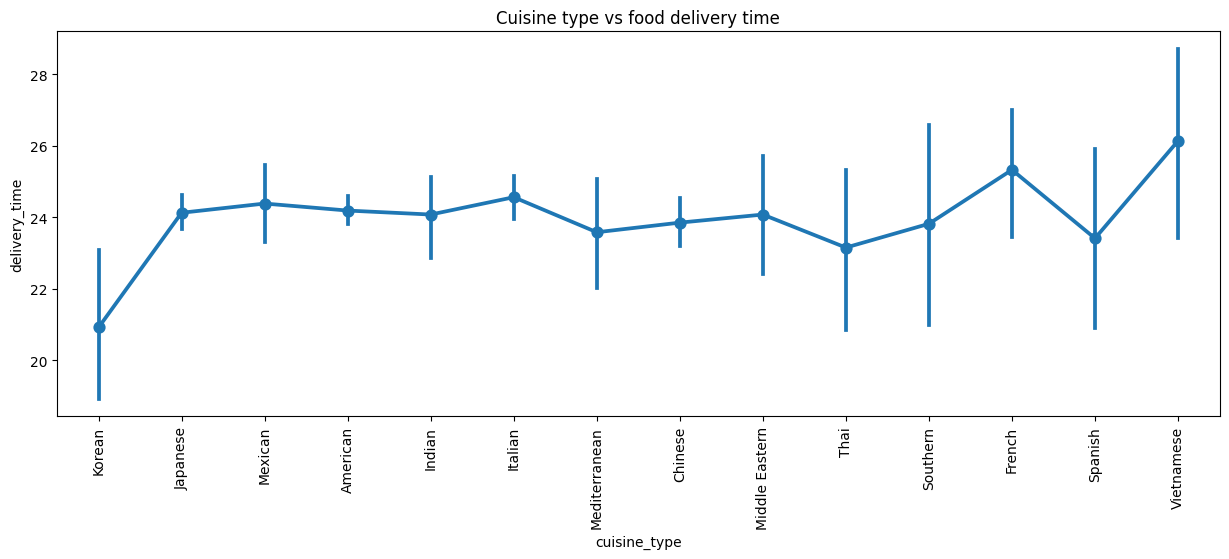

In [37]:
plt.figure(figsize=(15,5))
plt.title("Cuisine type vs food delivery time");
plt.xticks(rotation=90)
sns.pointplot(x = 'cuisine_type', y = 'delivery_time', data = data);
plt.show();

* Korean food is the fastest to be delivered
* Vietnamese and French takes longer than the others to be delivered

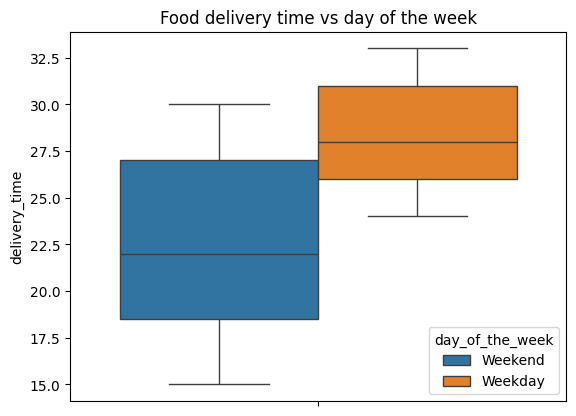

In [38]:
plt.title("Food delivery time vs day of the week");
sns.boxplot(data=data,y="delivery_time", hue="day_of_the_week");
plt.show();

* food is delivered fasted on weekends

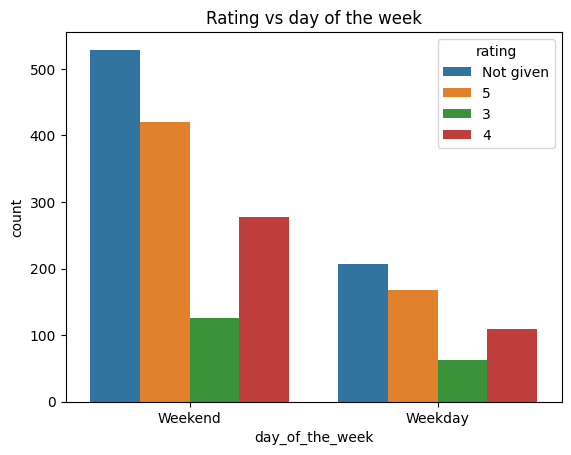

In [39]:
plt.title("Rating vs day of the week");
sns.countplot(data=data, x="day_of_the_week",hue="rating");
plt.show()

* the distribution of ratings appear to be the same between weekdays and weekends

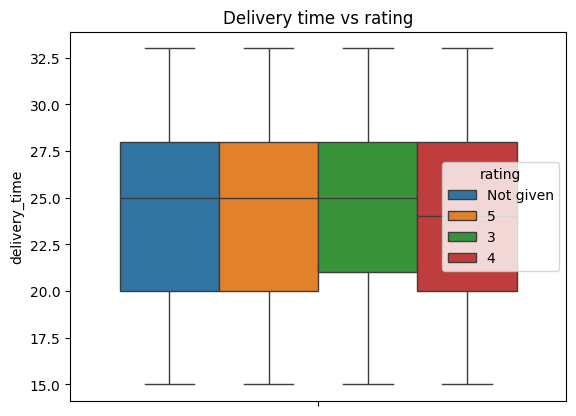

In [40]:
plt.title("Delivery time vs rating");
sns.boxplot(data=data,y="delivery_time", hue="rating");
plt.show();

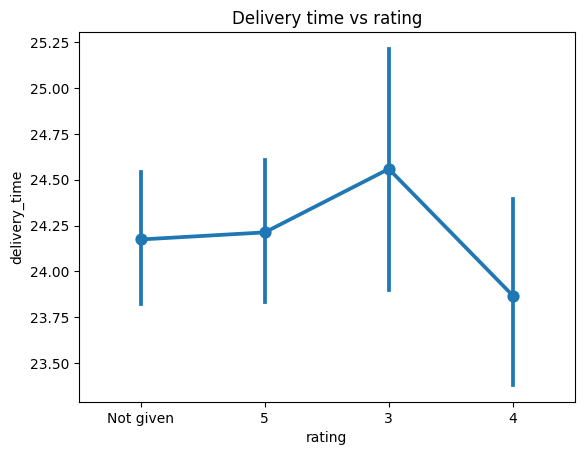

In [41]:
plt.title("Delivery time vs rating");
sns.pointplot(x = 'rating', y = 'delivery_time', data = data);
plt.show();

* orders with ratings 3 tend to have a longer delivery time

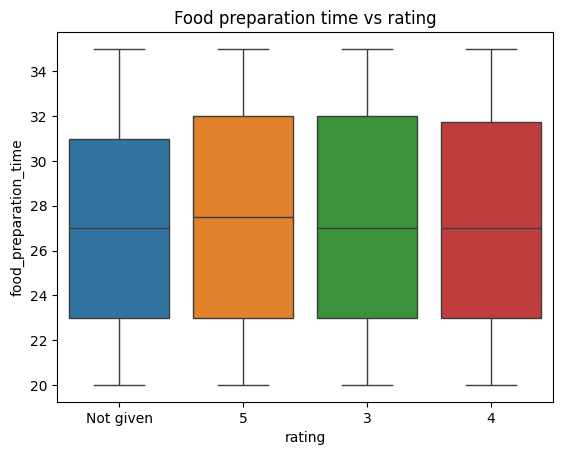

In [42]:
plt.title("Food preparation time vs rating");
sns.boxplot(data=data,x='rating',y="food_preparation_time", hue="rating");
plt.show();

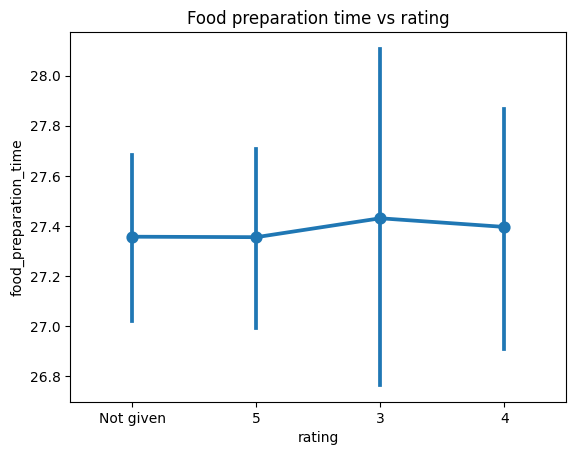

In [43]:
plt.title("Food preparation time vs rating");
sns.pointplot(x = 'rating', y = 'food_preparation_time', data = data);
plt.show();

* there does not appear to be any significant relationship between Food preparation time and order rating

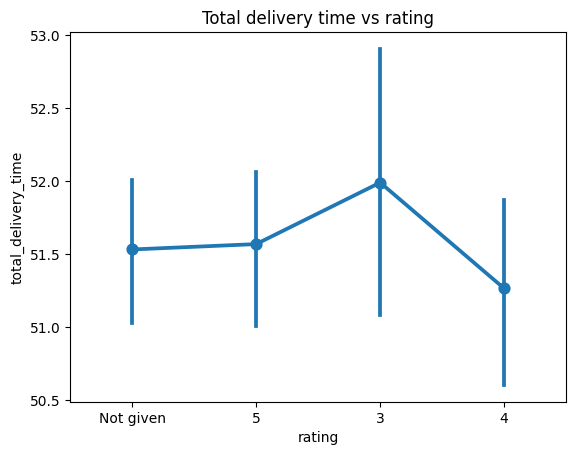

In [44]:
data['total_delivery_time']=data['food_preparation_time']+data['delivery_time']
plt.title("Total delivery time vs rating");
sns.pointplot(x = 'rating', y = 'total_delivery_time', data = data);
plt.show();

* orders with rating 3 tend to have longer delivery times
* orders with rating 4 actually tend to have a shorter delivery time than the ones with ratings 3 or 5

In [45]:
# checking the ratings distribution within the cuisine types
cuisine=data.loc[:,['cuisine_type','rating']]
cuisine_grouped=cuisine.groupby('cuisine_type')['rating'].value_counts().unstack()
cuisine_grouped['Total']=cuisine_grouped.sum(axis=1)
cuisine_grouped.sort_values('Total', ascending=False, inplace=True)
cuisine_grouped[['3', '4', '5', 'Not given']] = cuisine_grouped[['3', '4', '5', 'Not given']].div(cuisine_grouped['Total'], axis=0) * 100
cuisine_grouped



rating,3,4,5,Not given,Total
cuisine_type,,,,,
American,10.958904,22.260274,29.794521,36.986301,584.0
Japanese,8.510638,19.361702,30.212766,41.914894,470.0
Italian,9.395973,18.120805,30.201342,42.281879,298.0
Chinese,11.162791,18.604651,32.093023,38.139535,215.0
Mexican,7.792208,20.779221,33.766234,37.662338,77.0
Indian,6.849315,17.808219,43.835616,31.506849,73.0
Middle Eastern,10.204082,32.653061,26.530612,30.612245,49.0
Mediterranean,19.565217,15.217391,34.782609,30.434783,46.0
Thai,NaN,15.789474,31.578947,52.631579,19.0


In [46]:
# filter out orders without rating
ratings=data.loc[data['rating']!='Not given',['cuisine_type','rating']]

# convert ratings from strings to numeric values
ratings['rating']=ratings['rating'].astype(int)

# group by cuisine type and calculate the count of ratings and the average rating
ratings_grouped=ratings.groupby('cuisine_type')['rating'].agg(count='size',avg='mean').reset_index()
ratings_grouped.sort_values(by=['avg'],inplace=True, ascending=False)
ratings_grouped.reset_index(drop=True)

,cuisine_type,count,avg
0,Spanish,6,4.833333
1,Thai,9,4.666667
2,Indian,50,4.540000
3,Mexican,48,4.416667
4,Japanese,273,4.373626
5,Italian,172,4.360465
6,Chinese,133,4.338346
7,Southern,13,4.307692
8,French,10,4.300000
9,American,368,4.298913


* Spanish, Thai and Indian have the top 3 highest average ratings, though the count of ratings for Thai and Spanish is very low, so the average for those two is not necessarily representative
* Vietnamese, Korean and Mediterranean have the top 3 lowest average ratings

In [47]:
#restaurant name vs cost of the order, and number of unique cuisine types produced
rest_cuisine_cost=data.groupby("restaurant_name").agg({'cuisine_type':pd.Series.nunique,'cost_of_the_order':'sum'}).reset_index().rename(columns={'cost_of_the_order':'total_ammount'})
rest_cuisine_cost.sort_values(by=['total_ammount'], ascending=False, inplace=True)
rest_cuisine_cost.reset_index(drop=True,inplace=True)
rest_cuisine_cost.head(20)

,restaurant_name,cuisine_type,total_ammount
0,Shake Shack,1,3579.53
1,The Meatball Shop,2,2145.21
2,Blue Ribbon Sushi,1,1903.95
3,Blue Ribbon Fried Chicken,1,1662.29
4,Parm,1,1112.76
5,RedFarm Broadway,1,965.13
6,RedFarm Hudson,1,921.21
7,TAO,1,834.50
8,Han Dynasty,1,755.29
9,Blue Ribbon Sushi Bar & Grill,1,666.62


* out of top 20 restaurants in terms of overall profit only 1 serves 2 types of cuisine, the rest only serve a single type of cuisine

In [48]:
top_10_rest=rest_cuisine_cost.loc[:9,'restaurant_name'].tolist()
top_10_rest
top_10_cuisine=data.loc[data['restaurant_name'].isin(top_10_rest),['restaurant_name','cuisine_type']]
print(top_10_cuisine.groupby('restaurant_name').value_counts())

restaurant_name                cuisine_type
Blue Ribbon Fried Chicken      American         96
Blue Ribbon Sushi              Japanese        119
Blue Ribbon Sushi Bar & Grill  Japanese         44
Han Dynasty                    Chinese          46
Parm                           Italian          68
RedFarm Broadway               Chinese          59
RedFarm Hudson                 Chinese          55
Shake Shack                    American        219
TAO                            Japanese         49
The Meatball Shop              Italian         112
                               American         20
Name: count, dtype: int64


* top 10 restaurants in terms of overall profit serve the following types of cuisine:
American, Italian, Japanese, Chinese

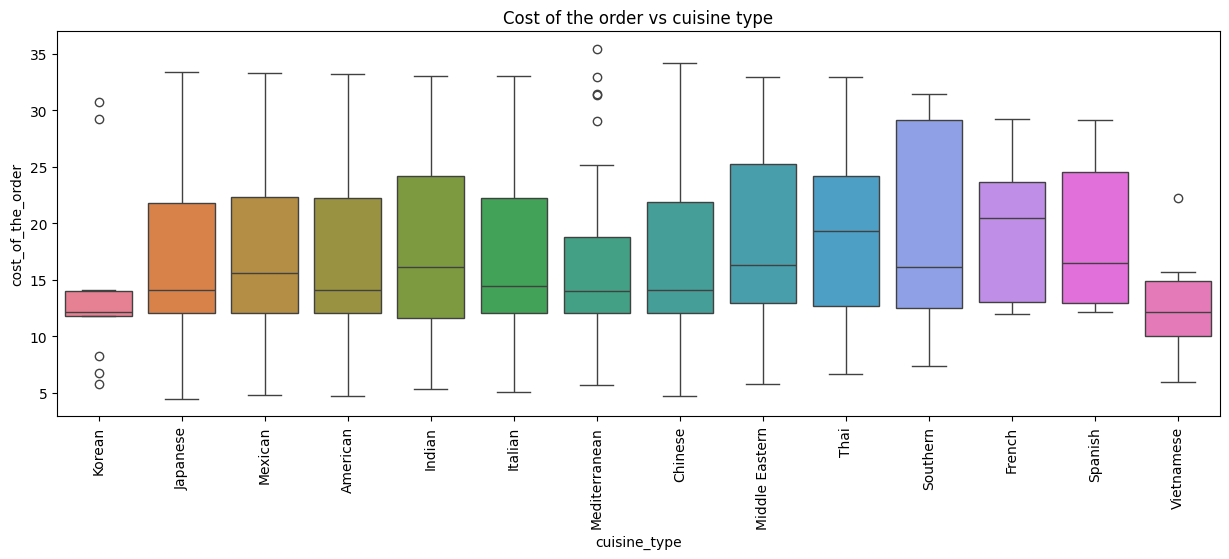

In [49]:
plt.figure(figsize=(15,5))
plt.title("Cost of the order vs cuisine type");
sns.boxplot(data=data,x='cuisine_type',y="cost_of_the_order", hue="cuisine_type");
plt.xticks(rotation=90)
plt.show();

In [50]:
data.groupby('cuisine_type')['cost_of_the_order'].describe()


,count,mean,std,min,25%,50%,75%,max
cuisine_type,,,,,,,,
American,584.0,16.319829,7.462290,4.71,12.0800,14.120,22.2600,33.18
Chinese,215.0,16.305209,7.631503,4.75,12.1050,14.120,21.8800,34.19
French,18.0,19.793889,6.508990,11.98,13.0525,20.470,23.6550,29.25
Indian,73.0,16.919726,7.897493,5.34,11.6400,16.150,24.2000,33.03
Italian,298.0,16.418691,7.268831,5.05,12.0800,14.480,22.2600,33.03
Japanese,470.0,16.304532,7.422722,4.47,12.0800,14.070,21.8300,33.37
Korean,13.0,14.001538,7.563540,5.77,11.8400,12.180,14.0200,30.75
Mediterranean,46.0,15.474783,7.604720,5.67,12.0925,13.995,18.7825,35.41
Mexican,77.0,16.933117,7.555108,4.85,12.0800,15.570,22.3600,33.32


* Vietnamese and Korean cuisines are the cheapest on average
* French, Southern and Thai are the most expensive on average


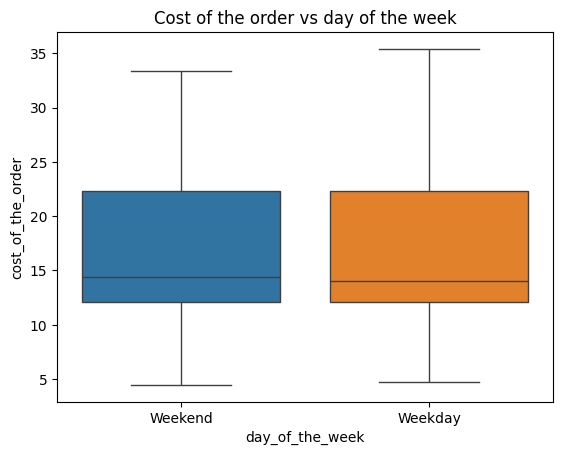

In [51]:
plt.title("Cost of the order vs day of the week");
sns.boxplot(data=data,x='day_of_the_week',y="cost_of_the_order", hue="day_of_the_week");
plt.show();

* Cost of the orders is similar on weekdays and weekends

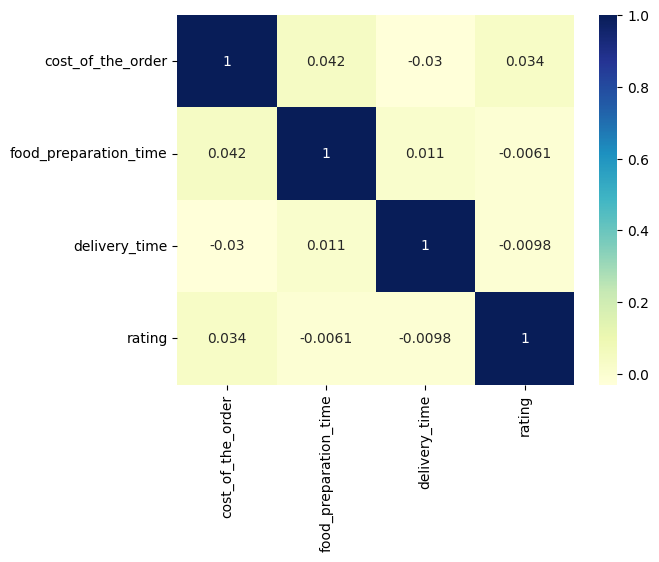

In [52]:
data1=data.copy()
data1['rating']=data1['rating'].replace('Not given',np.nan)
data1['rating']=data1['rating'].astype(float)
sns.heatmap(data=data1[['cost_of_the_order','food_preparation_time','delivery_time','rating']].corr(), annot=True, cmap='YlGnBu');
plt.show()

* there is no significant correlation between food preparation time, delivery time, rating and cost of the order

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [53]:
# filter out orders without rating
rest_prom=data.loc[data['rating']!='Not given',['restaurant_name','rating']]

# convert ratings from strings to numeric values
rest_prom['rating']=rest_prom['rating'].astype(int)

# group by restaurant name and calculate the count of ratings and the average rating
rest_prom_grouped=rest_prom.groupby('restaurant_name')['rating'].agg(count='size',avg='mean').reset_index()

# Get the restaurants with at least 50 ratings and average rating more than 4
rest_prom_grouped.loc[(rest_prom_grouped['count']>=50) & (rest_prom_grouped['avg']>4),'restaurant_name']


16     Blue Ribbon Fried Chicken
17             Blue Ribbon Sushi
117                  Shake Shack
132            The Meatball Shop
Name: restaurant_name, dtype: object

4 restaurants fulfill the criteria for the promotional offer:
* Blue Ribbon Fried Chicken
* Blue Ribbon Sushi
* Shake Shack
* The Meatball Shop


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [54]:
total_revenue=0
#get all order costs from the dataset:
costs=data.loc[:,'cost_of_the_order']

#loop through the costs and calculate the revenue:
for i in range(len(costs)):
  if costs[i]>20:
    total_revenue+=costs[i]*0.25
  elif costs[i]>5:
    total_revenue+=costs[i]*0.15

print("Total net revenue generated by the company across all orders is ${:.2f}".format(total_revenue))


Total net revenue generated by the company across all orders is $6166.30


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [55]:
#data['total_time']=data['food_preparation_time']+data['delivery_time']
delivery_60_mins=data.loc[data['total_delivery_time']>60,'total_delivery_time'].count()/data['total_delivery_time'].count()*100
print("{:.2f}% of all orders take longer than 60 minutes to be delivered after the order is placed".format(delivery_60_mins))

10.54% of all orders take longer than 60 minutes to be delivered after the order is placed


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [56]:
delivery_weekday=data.loc[data['day_of_the_week']=='Weekday','delivery_time'].mean()
delivery_weekend=data.loc[data['day_of_the_week']=='Weekend','delivery_time'].mean()

print("Average delivery time on weekdays is {:.1f} minutes, while average delivery time during the weekends is {:.1f} minutes".format(delivery_weekday,delivery_weekend))

Average delivery time on weekdays is 28.3 minutes, while average delivery time during the weekends is 22.5 minutes


* deliveries are faster on weekends


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
* It takes minimum 20 minutes to prepare an order once it is placed
* On average it takes 27 minutes to prepare an order
* The food delivery time ranges from 15 to 33 minutes and takes on average 24 minutes
* Most people do not rate their orders: 736 out of 1898 orders (or almost 39%) are not rated.
* The orders that are rated have the rating of 3 (10%), 4 (20%) or 5 (31%).
* The dataset contains information about orders from 1200 different customers.
* Number of customers who placed more than 1 order is 416
* Number of customers who placed only a single order is 784
* Most popular cuisine types are American, Japanese, Italian and Chinese
* Vietnamese, Spanish and Korean have the least number of orders
* Majority of the orders were placed on Saturdays and Sundays
* Food preparation time is the same during all week
* Korean and Vietnamese food is prepared faster on average
* Italian and Thai take longer than the rest if we check the median time
* Korean food is the fastest to be delivered
* Vietnamese and French takes longer than the others to be delivered
* Food is delivered fasted on weekends
* The distribution of ratings appear to be the same between weekdays and weekends
* There does not appear to be any significant relationship between Food preparation time and order rating
* Orders with rating 3 tend to have longer delivery times
* Orders with rating 4 actually tend to have a shorter delivery time than the ones with ratings 3 or 5
* Spanish, Thai and Indian have the top 3 highest average ratings, though the count of ratings for Thai and Spanish is very low, so the average for those two is not necessarily representative
* Vietnamese, Korean and Mediterranean have the top 3 lowest average ratings
* Out of top 20 restaurants in terms of overall profit only 1 serves 2 types of cuisine, the rest only serve a single type of cuisine
* Top 10 restaurants in terms of overall profit serve the following types of cuisine: American, Italian, Japanese, Chinese
* Vietnamese and Korean cuisines are the cheapest on average
* French, Southern and Thai are the most expensive on average
* Cost of the orders is similar on weekdays and weekends
* There is no significant correlation between food preparation time, delivery time, rating and cost of the order

### Recommendations:

*  It makes sense to work more with the restaurants serving American, Japanese, Italian and Chinese cuisine
*  Efforts should not be invested in working with restaurants serving Vietnamese, Spanish or Korean cuisine
* The majority of the orders are made during the weekends, so the company should make sure the application is working especially reliably on Saturdays and Sundays and that enough delivery people are working during the weekends
* The company should not let the delivery times slip and should try to impprove the delivery times during the week. If possible it makes sense to try and improve the delivery times
* Majority of the orders are not rated, so it makes sense to look into the process of collecting the ratings to see if it can be improved to get more orders rated - that way additional insights can be gained with more data

In [58]:
%%shell
jupyter nbconvert --to html /content/PYF_Project_LearnerNotebook_FullCode_Antonova.ipynb

[NbConvertApp] Converting notebook /content/PYF_Project_LearnerNotebook_FullCode_Antonova.ipynb to html
[NbConvertApp] Writing 1554788 bytes to /content/PYF_Project_LearnerNotebook_FullCode_Antonova.html
